In [1]:
import operator
import sqlite3
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')
sns.set_context('talk')
plt.rcParams['figure.figsize'] = (10.0, 8.0)

In [2]:
parsed_conn = sqlite3.connect('parsed_lyrics.db')
parsed_conn.row_factory = sqlite3.Row

In [3]:
cur = parsed_conn.execute('SELECT COUNT(*) FROM albums')
cur.fetchone()[0]

18654

In [4]:
cur = parsed_conn.execute('SELECT COUNT(*) FROM songs')
cur.fetchone()[0]

185303

In [5]:
cur = parsed_conn.execute(
    'SELECT COUNT(*) FROM '
    '(SELECT DISTINCT singer FROM songs)'
)
cur.fetchone()[0]

4979

In [6]:
cur = parsed_conn.execute(
    'SELECT COUNT(*) FROM '
    '(SELECT DISTINCT song, singer FROM songs)'
)
cur.fetchone()[0]

139279

In [7]:
cur = parsed_conn.execute(
    'SELECT COUNT(*) FROM '
    '(SELECT DISTINCT lyrics_writer FROM songs)'
)
cur.fetchone()[0]

18581

In [8]:
# chinese only songs
cur = parsed_conn.execute(
    'SELECT COUNT(*) FROM '
    '(SELECT DISTINCT song, singer FROM songs '
    '     WHERE album_lang = "國語")'
)
cur.fetchone()[0]

91293

In [10]:
cur = parsed_conn.execute(
    'SELECT COUNT(song), year FROM songs '
    'WHERE album_lang = "國語" AND year NOT NULL '
    '     GROUP BY year'
    '     ORDER BY year DESC'
)
song_per_year = pd.DataFrame(
    cur.fetchall(), columns=['song_count', 'year']
)

In [11]:
cur = parsed_conn.execute(
    'SELECT COUNT(DISTINCT singer), year FROM songs '
    'WHERE album_lang = "國語" AND year NOT NULL '
    '     GROUP BY year'
    '     ORDER BY year DESC'
)
singer_per_year = pd.DataFrame(
    cur.fetchall(), columns=['singer_count', 'year']
)

In [12]:
stat_per_year = pd.merge(
    song_per_year, singer_per_year, on='year'
).sort('year')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1122ad3c8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x114bb8748>], dtype=object)

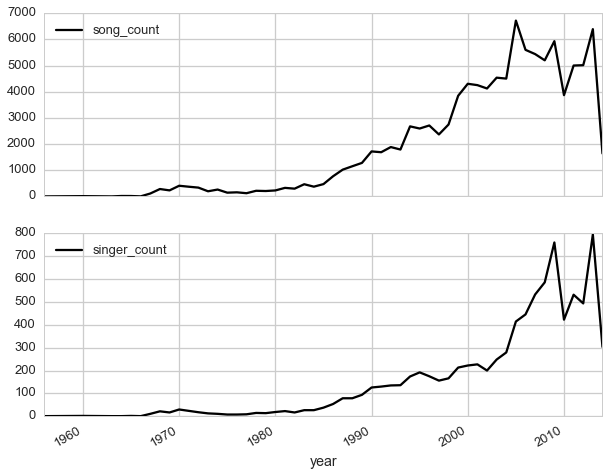

In [13]:
stat_per_year.plot(x='year', subplots=True, sharex=True)